In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import math

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

In [2]:
file_folder = '/Users/rosleeb/ieee-fraud-detection'
train_identity = pd.read_csv(f'{file_folder}/train_identity.csv')
train_transaction = pd.read_csv(f'{file_folder}/train_transaction.csv')
test_identity = pd.read_csv(f'{file_folder}/test_identity.csv')
test_transaction = pd.read_csv(f'{file_folder}/test_transaction.csv')

In [3]:
#train_identity.head()
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [5]:
train.dropna(axis=0, subset=['isFraud'], inplace=True)
y = train.isFraud
train.drop(['isFraud'], axis=1, inplace=True)

X = train.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [6]:
X_train.shape

(472432, 402)

In [7]:
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

card2      7115
card3      1260
card5      3392
addr1     52560
addr2     52560
          ...  
id_22    468305
id_24    468646
id_25    468338
id_26    468311
id_32    410221
Length: 384, dtype: int64


In [34]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return roc_auc_score(y_valid, preds)

In [31]:
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()] 

reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)


In [35]:
print("ROC (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

ROC (Drop columns with missing values):
0.9373397853228919


In [7]:
imputer = SimpleImputer() 
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


In [38]:
print("ROC (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

ROC (Imputation):


KeyboardInterrupt: 

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(reduced_X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [49]:
X_test = reduced_test.select_dtypes(exclude=['object'])

cols_with_missing = [col for col in X_test.columns
                     if X_test[col].isnull().any()] 

reduced_test = X_test.drop(cols_with_missing, axis=1)

reduced_X_test = reduced_test.select_dtypes(exclude=['object'])

In [58]:
reduced_X_train

,TransactionID,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
216944,3203944,5069957,440.950,13809,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0
558411,3545411,14773564,460.000,12695,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,40.0,2.0
369611,3356611,9207277,49.000,12695,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,8.0,2.0
177738,3164738,3874678,35.950,18132,137.0,122.0,0.0,0.0,208.0,92.0,0.0,0.0,93.0,0.0,94.0,0.0,601.0,102.0
259974,3246974,6225517,112.990,17399,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,3346783,8906146,97.000,18018,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
152315,3139315,3162019,261.950,8436,5.0,4.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,22.0,4.0
117952,3104952,2307868,76.023,14037,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
435829,3422829,11032606,331.000,4436,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0


In [51]:
preds_test = model.predict(reduced_X_test)

ValueError: Number of features of the model must match the input. Model n_features is 18 and input n_features is 47 

In [14]:
imputed_X_train.shape

(472432, 402)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(imputed_X_train[:50000], y_train[:50000])
model.score(imputed_X_valid[:50000], y_valid[:50000])

0.9749

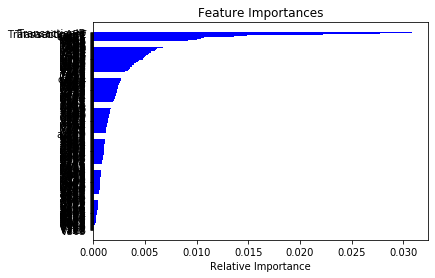

In [9]:
features = imputed_X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
top_feats = []
j = 0
for i in indices:
    top_feats.append((features[i]))

In [11]:
selected_X_train = imputed_X_train[top_feats[0:45]]
selected_X_valid = imputed_X_valid[top_feats[0:45]]

In [12]:
selected_model = RandomForestClassifier(n_estimators=100, random_state=0)
selected_model.fit(selected_X_train, y_train)
#model.score(selected_X_valid, y_valid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
selected_model.score(selected_X_valid, y_valid)

0.9688590103972635

In [76]:
imputer = SimpleImputer() 
imputed_X_test = pd.DataFrame(imputer.transform(test))

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [14]:
X_test = test.select_dtypes(exclude=['object'])

In [24]:
X_test.rename(columns = {'id-22':'id_22'}, inplace = True)
X_test.rename(columns = {'id-24':'id_24'}, inplace = True)

selected_X_train = X_train[top_feats[0:45]]
selected_X_test = X_test[top_feats[0:45]]

imputer = SimpleImputer() 
imputed_X_train = pd.DataFrame(imputer.fit_transform(selected_X_train))
imputed_X_test = pd.DataFrame(imputer.transform(selected_X_test))


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [25]:
preds = selected_model.predict(imputed_X_test)

In [26]:
output = pd.DataFrame({'TransactionID': X_test['TransactionID'],
                       'IsFraud': preds})
output.to_csv('submission.csv', index=False)

In [27]:
output.head()

,TransactionID,IsFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


In [23]:
top_feats[0:45]

['V305',
 'C3',
 'V120',
 'V107',
 'V119',
 'V191',
 'V118',
 'V240',
 'V28',
 'V27',
 'V117',
 'V328',
 'V68',
 'V121',
 'V14',
 'V141',
 'V325',
 'V327',
 'V330',
 'id_22',
 'V122',
 'V114',
 'V329',
 'V337',
 'V269',
 'V241',
 'V334',
 'V173',
 'V138',
 'V196',
 'V339',
 'V142',
 'V113',
 'id_24',
 'V89',
 'V193',
 'V336',
 'V302',
 'V163',
 'V184',
 'V220',
 'V182',
 'V110',
 'V226',
 'V65']